In [ ]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import time
import seaborn as sns

In [335]:
df = pd.read_csv('leg234_data.csv')
df
sub_df = df[['PDMEAN', 'LONGITUD', 'LATITUDE', 'time', 'FerryBox.C3_Turbidity', 'TOTAL']]

In [312]:
df = df.astype(float)
print(df.dtypes)
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
df = pd.DataFrame(scaled_df, columns=names)

LATITUDE                        float64
LONGITUD                        float64
PDMEAN                          float64
TOTAL                           float64
dataid                          float64
NMEA.Wind_Speed                 float64
NMEA.Wind_Angle                 float64
NMEA.Wave_Height                float64
PCO2.H2O_mmm                    float64
PCO2.CO2_umm                    float64
PCO2.atm_cond                   float64
NMEA.Humidity                   float64
NMEA.Trykk                      float64
FerryBox.SBE45_Salinity         float64
FerryBox.SBE45_Conductivity     float64
FerryBox.Optode_Saturation      float64
FerryBox.C3_Turbidity           float64
FerryBox.C3_CHLAFluorescence    float64
FerryBox.C3_Temperature         float64
FerryBox.C3_CDOMFluorescence    float64
date                            float64
time                            float64
dtype: object


In [336]:
df = df.astype(float)
print(df.dtypes)
names = df.columns
# Create the Scaler object
scaler = preprocessing.Normalizer()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df.T).T
df = pd.DataFrame(scaled_df, columns=names)

LATITUDE                        float64
LONGITUD                        float64
PDMEAN                          float64
TOTAL                           float64
dataid                          float64
NMEA.Wind_Speed                 float64
NMEA.Wind_Angle                 float64
NMEA.Wave_Height                float64
PCO2.H2O_mmm                    float64
PCO2.CO2_umm                    float64
PCO2.atm_cond                   float64
NMEA.Humidity                   float64
NMEA.Trykk                      float64
FerryBox.SBE45_Salinity         float64
FerryBox.SBE45_Conductivity     float64
FerryBox.Optode_Saturation      float64
FerryBox.C3_Turbidity           float64
FerryBox.C3_CHLAFluorescence    float64
FerryBox.C3_Temperature         float64
FerryBox.C3_CDOMFluorescence    float64
date                            float64
time                            float64
dtype: object


In [337]:
df = df.drop(columns=['NMEA.Wave_Height'])

In [338]:
y = df.iloc[:, df.columns == 'TOTAL']
X = df.iloc[:, df.columns != 'TOTAL']


In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [340]:
X_train

,LATITUDE,LONGITUD,PDMEAN,dataid,NMEA.Wind_Speed,NMEA.Wind_Angle,PCO2.H2O_mmm,PCO2.CO2_umm,PCO2.atm_cond,NMEA.Humidity,NMEA.Trykk,FerryBox.SBE45_Salinity,FerryBox.SBE45_Conductivity,FerryBox.Optode_Saturation,FerryBox.C3_Turbidity,FerryBox.C3_CHLAFluorescence,FerryBox.C3_Temperature,FerryBox.C3_CDOMFluorescence,date,time
51429,0.001862,-0.001241,0.003719,0.002130,0.002061,0.001463,0.001584,0.002126,0.002134,0.002177,0.002133,0.002085,0.002036,0.002110,0.000043,-0.002167,0.002164,-0.002048,0.002133,0.000401
106470,0.001324,-0.001838,0.002523,0.002130,0.001517,0.001593,0.001584,0.002126,0.002134,0.002025,0.002130,0.002143,0.002214,0.002164,0.000019,-0.002255,0.002192,-0.002594,0.002133,0.002243
164979,0.002913,-0.003645,0.001066,0.002136,0.001825,0.002057,0.001584,0.002126,0.002134,0.002085,0.002144,0.002085,0.002036,0.001935,0.015122,-0.001769,0.003278,-0.001911,0.002133,0.001442
204965,-0.000822,-0.001502,0.000650,0.002144,0.001821,0.003024,0.001584,0.002126,0.002134,0.002195,0.002125,0.002137,0.002223,0.002139,-0.000009,-0.002122,0.002216,-0.002048,0.002134,0.000401
217407,0.002444,-0.001809,0.002315,0.002145,0.001839,0.001486,0.001584,0.002126,0.002134,0.002489,0.002123,0.002156,0.002184,0.002113,-0.000008,-0.001769,0.002114,-0.001911,0.002134,0.003205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.001316,-0.001987,0.002315,0.002131,0.001375,0.001679,0.001404,0.002172,0.002134,0.002421,0.002127,0.002150,0.002219,0.002175,0.000020,-0.002255,0.002188,-0.003004,0.002133,0.000000
103694,0.001325,-0.001806,0.001118,0.002130,0.002203,0.001435,0.001584,0.002126,0.002134,0.002023,0.002130,0.002152,0.002215,0.002164,0.000019,-0.002255,0.002178,-0.002321,0.002133,0.001042
131932,0.001327,-0.002124,0.001430,0.002131,0.002440,0.001882,0.001584,0.002126,0.002134,0.002115,0.002131,0.002155,0.002212,0.002163,0.000021,-0.002255,0.002168,-0.002048,0.002133,0.000961
146867,0.001742,-0.003456,0.003251,0.002133,0.002906,0.001445,0.001584,0.002126,0.002134,0.002085,0.002128,0.002080,0.002161,0.002124,0.000025,-0.002255,0.002201,-0.001843,0.002133,0.001682


Feature: LATITUDE, Score: 0.11183
Feature: LONGITUD, Score: 0.15472
Feature: PDMEAN, Score: 0.31421
Feature: dataid, Score: 0.00798
Feature: NMEA.Wind_Speed, Score: 0.05977
Feature: NMEA.Wind_Angle, Score: 0.07608
Feature: PCO2.H2O_mmm, Score: 0.00293
Feature: PCO2.CO2_umm, Score: 0.01437
Feature: PCO2.atm_cond, Score: 0.00054
Feature: NMEA.Humidity, Score: 0.02277
Feature: NMEA.Trykk, Score: 0.01860
Feature: FerryBox.SBE45_Salinity, Score: 0.01951
Feature: FerryBox.SBE45_Conductivity, Score: 0.01621
Feature: FerryBox.Optode_Saturation, Score: 0.03152
Feature: FerryBox.C3_Turbidity, Score: 0.04667
Feature: FerryBox.C3_CHLAFluorescence, Score: 0.00989
Feature: FerryBox.C3_Temperature, Score: 0.02729
Feature: FerryBox.C3_CDOMFluorescence, Score: 0.01250
Feature: date, Score: 0.00011
Feature: time, Score: 0.05249


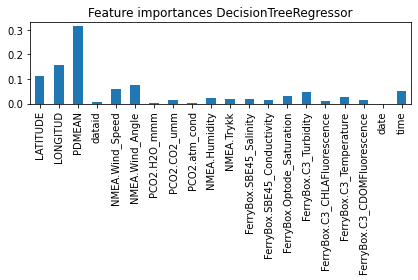

In [341]:
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature: %s, Score: %.5f' % (X.columns[i],v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
importances = pd.Series(importance, index=X.columns)

fig, ax = pyplot.subplots()
importances.plot.bar([x for x in range(len(importance))], importance)
ax.set_title("Feature importances DecisionTreeRegressor")
fig.tight_layout()
pyplot.show()


In [342]:
y_pred = model.predict(X_test)


In [343]:
print('MAE score: ', mean_absolute_error(y_test, y_pred))
print('R2 score: ', r2_score(y_test, y_pred))
print('Smape score: ', smape(y_test, y_pred.reshape(54925,1)))

MAE score:  0.00038315195757852063
R2 score:  0.540799378723412
Smape score:  TOTAL    0.344851
dtype: float64


In [344]:
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train.values.ravel())
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

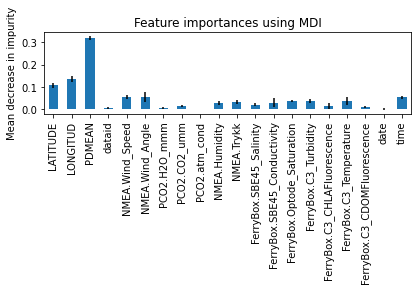

In [206]:
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = pyplot.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [345]:
forest_pred = forest.predict(X_test)

In [346]:
print('MAE score: ', mean_absolute_error(y_test, forest_pred))
print('R2 score: ', r2_score(y_test, forest_pred))
print('Smape score: ', smape(y_test, forest_pred.reshape(54925,1)))

MAE score:  0.0003141249270148207
R2 score:  0.7142062231018311
Smape score:  TOTAL    0.333652
dtype: float64


In [347]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=X.columns)

KeyboardInterrupt: 

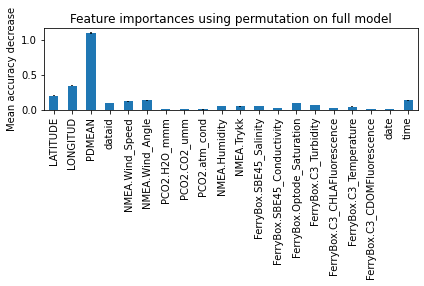

In [129]:
fig, ax = pyplot.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
pyplot.show()

In [280]:
from sklearn.preprocessing import scale 
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_absolute_error, r2_score
import sklearn

In [ ]:
from sklearn import preprocessing
# Get column names first
names = X_train.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(X_train)
scaled_df = pd.DataFrame(scaled_df, columns=names)

Text(0.5, 1.0, 'Total')

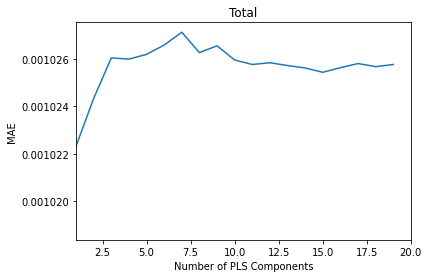

In [348]:
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X_train)

# Calculate MAPE using cross-validation, adding one component at a time
for i in np.arange(1, 21):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, X_train, y_train, cv=cv,
               scoring='neg_mean_absolute_error').mean()
    mse.append(score)

#plot test MAPE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MAE')
plt.xlim((1,20))
plt.title('Total')

In [324]:
pls = PLSRegression(n_components=5)
pls.fit(X_train, y_train)

PLSRegression(n_components=5)

In [325]:
pls_pred = pls.predict(X_test)

In [326]:
print('MAE score: ', mean_absolute_error(y_test, pls_pred))
print('R2 score: ', r2_score(y_test, pls_pred))
print('Smape score: ', smape(y_test, pls_pred.reshape(54925,1)))

MAE score:  0.5291156344091279
R2 score:  0.07955779505208327
Smape score:  TOTAL    1.360847
dtype: float64


In [289]:
def smape(A, F):
    return 1/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [291]:
smape(y_test, pls_pred)

TOTAL    1.223121
dtype: float64